In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/primetrade-ai/historical_data.csv
/kaggle/input/primetrade-ai/fear_greed_index.csv


#### import library used to analyze data.

In [2]:
import seaborn as sns

In [3]:
fear_greed = pd.read_csv('/kaggle/input/primetrade-ai/fear_greed_index.csv')
trades = pd.read_csv('/kaggle/input/primetrade-ai/historical_data.csv')

In [4]:
fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [5]:
fear_greed.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [7]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


#### Summerize Date and Time.

In [8]:
fear_greed['date'] = pd.to_datetime(fear_greed['date'])
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit = 'ms')

trades['trade_date'] = trades['Timestamp'].dt.date
trades['trade_date'] = pd.to_datetime(trades['trade_date'])

#### Trader Performance Metrix

In [9]:
daily_performance = (
    trades.groupby(['Account', 'trade_date']).agg(
        total_pnl = ('Closed PnL', 'sum'),
        trade_count = ('Trade ID', 'count'),
        avg_trade_size = ('Size USD', 'mean'),
        total_fees = ('Fee', 'sum'),
        buy_trades = ('Side', lambda x : (x == 'BUY').sum()),
        sell_trades = ('Side', lambda x : (x == 'SELL').sum())
    ).reset_index()
)

In [10]:
daily_performance.head()

,Account,trade_date,total_pnl,trade_count,avg_trade_size,total_fees,buy_trades,sell_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05,462,14810.891818,1112.895650,139,323
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06,3356,16345.241940,6292.416654,1572,1784
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,2.060745e+04,320,2492.749906,202.167151,145,175
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,1.709873e+04,3533,1693.351684,1664.914670,1528,2005
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-06-15,1.017915e+04,3427,1533.468395,862.756068,1382,2045


#### Now merge both the date daily_performance and fear_geed for comparision

In [11]:
merged = daily_performance.merge(fear_greed, left_on = 'trade_date', right_on = 'date', how = 'left')
merged.head()

,Account,trade_date,total_pnl,trade_count,avg_trade_size,total_fees,buy_trades,sell_trades,timestamp,value,classification,date
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05,462,14810.891818,1112.895650,139,323,1.730007e+09,74.0,Greed,2024-10-27
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06,3356,16345.241940,6292.416654,1572,1784,1.739943e+09,44.0,Fear,2025-02-19
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,2.060745e+04,320,2492.749906,202.167151,145,175,1.730007e+09,74.0,Greed,2024-10-27
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,1.709873e+04,3533,1693.351684,1664.914670,1528,2005,1.739943e+09,44.0,Fear,2025-02-19
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-06-15,1.017915e+04,3427,1533.468395,862.756068,1382,2045,NaN,NaN,NaN,NaT


#### Now we will discover some hidden pattens from the date.

In [12]:
sentiment_perfomance = (
    merged.groupby('classification').agg(
        avg_pnl = ('total_pnl', 'mean'),
        median_pnl = ('total_pnl', 'median'),
        avg_trade_count = ('trade_count', 'mean'),
        avg_size = ('avg_trade_size', 'mean')
    ).sort_values('avg_pnl', ascending = False)
)
sentiment_perfomance.head()

,avg_pnl,median_pnl,avg_trade_count,avg_size
classification,,,,
Fear,209372.662205,81389.682515,4183.46875,5926.522723
Greed,99675.516731,35988.376437,1134.03125,5839.310974
Extreme Greed,35393.098355,0.000000,1392.40000,4344.447836
Neutral,19842.797260,-0.418640,892.62500,3793.444161


In [13]:
merged['risk_intensity'] = merged['avg_trade_size'] * merged['trade_count']

risk_by_sentiment = (
    merged.groupby('classification')['risk_intensity'].mean()
    .sort_values(ascending = False)
)
risk_by_sentiment

classification
Fear             2.200495e+07
Extreme Greed    7.881354e+06
Greed            3.609490e+06
Neutral          2.730404e+06
Name: risk_intensity, dtype: float64

In [14]:
correlation = merged[['total_pnl', 'trade_count', 'avg_trade_size', 'value']].corr()

<Axes: >

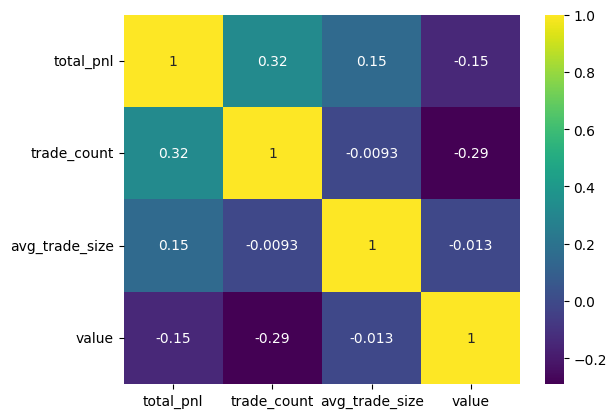

In [15]:
sns.heatmap(correlation, cmap = 'viridis', annot = True)

In [16]:
def sentiment_bucket(v):
    if v < 25:
        return 'Extreme Fear'
    elif v < 50:
        return 'Fear'

    elif v < 75:
        return 'Greed'

    elif v < 100:
        return 'Extreme Greed'

    else:
        return "NaN"
merged['sentiment_regime'] = merged['value'].apply(sentiment_bucket)
merged.head()

,Account,trade_date,total_pnl,trade_count,avg_trade_size,total_fees,buy_trades,sell_trades,timestamp,value,classification,date,risk_intensity,sentiment_regime
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05,462,14810.891818,1112.895650,139,323,1.730007e+09,74.0,Greed,2024-10-27,6842632.02,Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06,3356,16345.241940,6292.416654,1572,1784,1.739943e+09,44.0,Fear,2025-02-19,54854631.95,Fear
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,2.060745e+04,320,2492.749906,202.167151,145,175,1.730007e+09,74.0,Greed,2024-10-27,797679.97,Greed
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,1.709873e+04,3533,1693.351684,1664.914670,1528,2005,1.739943e+09,44.0,Fear,2025-02-19,5982611.50,Fear
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-06-15,1.017915e+04,3427,1533.468395,862.756068,1382,2045,NaN,NaN,NaN,NaT,5255196.19,NaN


In [17]:
regime_analysis = merged.groupby('sentiment_regime').agg(
    win_rate = ('total_pnl', lambda x : (x > 0).mean()),
    avg_pnl = ('total_pnl', 'mean'),
    volatility = ('total_pnl', 'std')
)
regime_analysis

,win_rate,avg_pnl,volatility
sentiment_regime,,,
Extreme Greed,0.4000,35393.098355,85325.499902
Fear,0.9375,209372.662205,380423.906864
Greed,0.7750,83708.972836,255258.132441
NaN,0.7600,2868.373905,122819.532164


#### We can see that traders achieves better average PnL during Fear regimes than Greed regimes.
#### But volatility of 'Extreme Greed' is low mean this is more stable and consistent than another sentiments.